Valores ausentes nos dados de treinamento:
 Dates         0
Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64
Valores ausentes nos dados de teste:
 Id            0
Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64
['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING'
 'FRAUD' 'GAMBLING' 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING'
 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION' 'RECOVERED VEHICLE' 'ROBBERY'
 'RUNAWAY' 'SECONDARY CODES' 'SEX OFFENSES FORCIBLE'
 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC'
 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']
Decision Tree Accuracy: 0.2311333

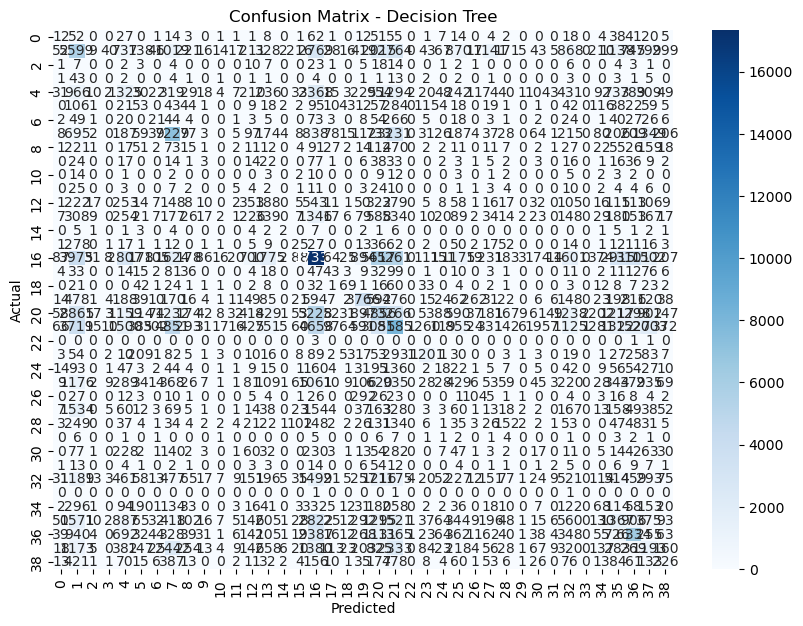

Arquivo de submissão preparado.
Primeiras linhas do arquivo de submissão:
   Id  ARSON  ASSAULT  BAD CHECKS  BRIBERY  BURGLARY  DISORDERLY CONDUCT  \
0   0    0.0      0.5         0.0      0.0       0.0                 0.0   
1   1    0.0      0.0         0.0      0.0       0.0                 0.0   
2   2    0.0      0.0         0.0      0.0       0.0                 0.0   
3   3    0.0      0.0         0.0      0.0       0.0                 0.0   
4   4    0.0      0.0         0.0      0.0       0.0                 0.0   

   DRIVING UNDER THE INFLUENCE  DRUG/NARCOTIC  DRUNKENNESS  ...  \
0                          0.0            0.0          0.0  ...   
1                          0.0            0.0          0.0  ...   
2                          0.0            0.0          0.0  ...   
3                          0.0            0.0          0.0  ...   
4                          0.0            0.0          0.0  ...   

   SEX OFFENSES NON FORCIBLE  STOLEN PROPERTY  SUICIDE  SUSPICIOUS

In [94]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, log_loss
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Carregar os dados
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Verificar valores ausentes
print("Valores ausentes nos dados de treinamento:\n", train_data.isnull().sum())
print("Valores ausentes nos dados de teste:\n", test_data.isnull().sum())

# Converter a coluna de datas para datetime
train_data['Dates'] = pd.to_datetime(train_data['Dates'])
test_data['Dates'] = pd.to_datetime(test_data['Dates'])

# Extrair componentes da data
train_data['Year'] = train_data['Dates'].dt.year
train_data['Month'] = train_data['Dates'].dt.month
train_data['Day'] = train_data['Dates'].dt.day
train_data['Hour'] = train_data['Dates'].dt.hour
train_data['DayOfWeek'] = train_data['Dates'].dt.dayofweek

test_data['Year'] = test_data['Dates'].dt.year
test_data['Month'] = test_data['Dates'].dt.month
test_data['Day'] = test_data['Dates'].dt.day
test_data['Hour'] = test_data['Dates'].dt.hour
test_data['DayOfWeek'] = test_data['Dates'].dt.dayofweek

# Codificar a coluna 'Category'
label_encoder = LabelEncoder()
train_data['Category'] = label_encoder.fit_transform(train_data['Category'])
print(label_encoder.classes_)

# Codificar variáveis categóricas no conjunto de treino e teste
categorical_cols = ['PdDistrict', 'DayOfWeek']

for col in categorical_cols:
    le = LabelEncoder()
    train_data[col] = le.fit_transform(train_data[col])
    test_data[col] = le.transform(test_data[col])

# Selecionar colunas relevantes para o modelo
columns_to_use = ['Year', 'Month', 'Day', 'Hour', 'DayOfWeek', 'PdDistrict', 'X', 'Y']
X = train_data[columns_to_use]
y = train_data['Category']

# Dividir os dados em conjuntos de treino e validação
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)


# Treinar o modelo de árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_val)
y_pred_proba_tree = tree.predict_proba(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))

# Matriz de Confusão e Relatório de Classificação para Decision Tree
conf_matrix_tree = confusion_matrix(y_val, y_pred_tree)
class_report_tree = classification_report(y_val, y_pred_tree)

print("Confusion Matrix - Decision Tree:")
print(conf_matrix_tree)
print("\nClassification Report - Decision Tree:")
print(class_report_tree)

# Visualização da Matriz de Confusão - Decision Tree
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Normalizar as probabilidades para garantir que somam para 1
y_pred_proba_tree = y_pred_proba_tree / y_pred_proba_tree.sum(axis=1, keepdims=True)

# Fazer previsões nos dados de teste usando o modelo de árvore de decisão
test_pred_proba = tree.predict_proba(test_data[columns_to_use])

# Normalizar as probabilidades para garantir que somam para 1
test_pred_proba = test_pred_proba / test_pred_proba.sum(axis=1, keepdims=True)

# Preparar o arquivo de submissão
submission = pd.DataFrame(test_pred_proba, columns=label_encoder.classes_)
submission.insert(0, 'Id', test_data['Id'])

# Adicionar colunas ausentes no conjunto de teste
for col in label_encoder.classes_:
    if col not in submission.columns:
        submission[col] = 0

# Preencher valores NaN com zero
submission.fillna(0, inplace=True)

submission.to_csv('submission_decision_tree.csv', index=False)
print("Arquivo de submissão preparado.")
print("Primeiras linhas do arquivo de submissão:")
print(submission.head())
